In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.metrics import classification_report

In [6]:
print(tf.keras.__version__)

2.4.0


In [7]:
mn=tf.keras.datasets.mnist
(X_train,Y_train),(X_test,Y_test)=mn.load_data()

In [8]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [9]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32') 

In [10]:
re=784
X_train= X_train.reshape(60000,re) 
X_test = X_test.reshape(10000,re) 

In [11]:
X_train /= 255
X_test /= 255

In [12]:
print(X_train.shape[0])
print(X_test.shape[0])

60000
10000


In [13]:
Y_train = tf.keras.utils.to_categorical(Y_train, 10) 

In [14]:
#sgd

In [15]:
model1=tf.keras.Sequential([
      tf.keras.layers.Dense(10,input_shape=(784,),activation="softmax")
])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [16]:
model1.compile(optimizer="sgd",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model1=model1.fit(X_train,Y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.8494 - accuracy: 0.7996 - val_loss: 0.5094 - val_accuracy: 0.8741
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4906 - accuracy: 0.8737 - val_loss: 0.4187 - val_accuracy: 0.8920
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4287 - accuracy: 0.8857 - val_loss: 0.3820 - val_accuracy: 0.8981
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3981 - accuracy: 0.8919 - val_loss: 0.3610 - val_accuracy: 0.9036
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3786 - accuracy: 0.8959 - val_loss: 0.3479 - val_accuracy: 0.9059
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3652 - accuracy: 0.8991 - val_loss: 0.3384 - val_accuracy: 0.9079
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3548 - accuracy: 0.9015 - val_loss: 0.3301 - val_accuracy:

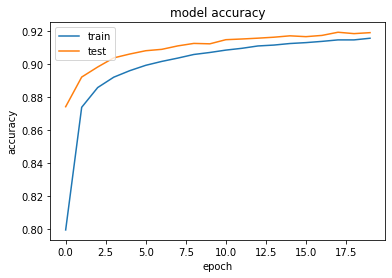

In [17]:
plt.plot(trained_model1.history['accuracy'])
plt.plot(trained_model1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

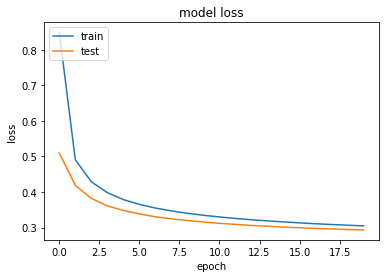

In [18]:
plt.plot(trained_model1.history['loss'])
plt.plot(trained_model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [19]:
Y_pred1=model1.predict(X_test)
Y_pred1=Y_pred1.argmax(axis=1)
print(classification_report(Y_test,Y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.96      0.97      0.97      1135
           2       0.92      0.89      0.90      1032
           3       0.89      0.91      0.90      1010
           4       0.91      0.93      0.92       982
           5       0.90      0.85      0.88       892
           6       0.93      0.95      0.94       958
           7       0.93      0.91      0.92      1028
           8       0.88      0.88      0.88       974
           9       0.90      0.89      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [20]:
#mini-batch

In [21]:
model2=tf.keras.Sequential([
      tf.keras.layers.Dense(10,input_shape=(784,),activation="softmax")
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [22]:
model2.compile(optimizer="sgd",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model2=model2.fit(X_train,Y_train,epochs=20,batch_size=64,validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 6s 7ms/step - loss: 1.0930 - accuracy: 0.7459 - val_loss: 0.6557 - val_accuracy: 0.8589
Epoch 2/20
750/750 [==============================] - 5s 7ms/step - loss: 0.6059 - accuracy: 0.8569 - val_loss: 0.5066 - val_accuracy: 0.8783
Epoch 3/20
750/750 [==============================] - 5s 7ms/step - loss: 0.5103 - accuracy: 0.8710 - val_loss: 0.4490 - val_accuracy: 0.8885
Epoch 4/20
750/750 [==============================] - 5s 7ms/step - loss: 0.4644 - accuracy: 0.8793 - val_loss: 0.4161 - val_accuracy: 0.8957
Epoch 5/20
750/750 [==============================] - 5s 7ms/step - loss: 0.4361 - accuracy: 0.8844 - val_loss: 0.3953 - val_accuracy: 0.8986
Epoch 6/20
750/750 [==============================] - 5s 7ms/step - loss: 0.4164 - accuracy: 0.8890 - val_loss: 0.3804 - val_accuracy: 0.8997
Epoch 7/20
750/750 [==============================] - 5s 7ms/step - loss: 0.4017 - accuracy: 0.8915 - val_loss: 0.3689 - val_accuracy: 0.9022
Epoch 

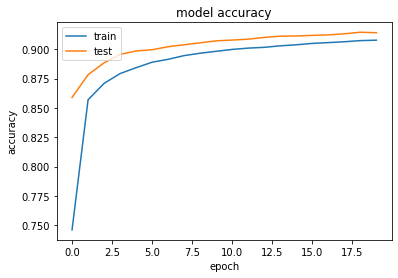

In [23]:
plt.plot(trained_model2.history['accuracy'])
plt.plot(trained_model2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

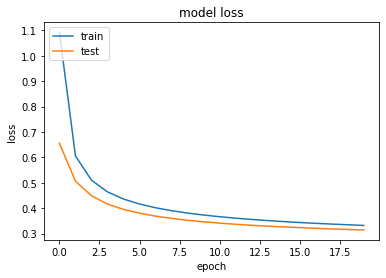

In [24]:
plt.plot(trained_model2.history['loss'])
plt.plot(trained_model2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [25]:
Y_pred2=model2.predict(X_test)
Y_pred2=Y_pred2.argmax(axis=1)
print(classification_report(Y_test,Y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.96      0.97      0.96      1135
           2       0.93      0.87      0.90      1032
           3       0.90      0.90      0.90      1010
           4       0.90      0.93      0.92       982
           5       0.91      0.84      0.88       892
           6       0.92      0.95      0.94       958
           7       0.92      0.91      0.91      1028
           8       0.86      0.88      0.87       974
           9       0.89      0.89      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [26]:
#adam

In [27]:
model3=tf.keras.Sequential([
      tf.keras.layers.Dense(10,input_shape=(784,),activation="softmax")
])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [28]:
model3.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model3=model3.fit(X_train,Y_train,epochs=20,batch_size=64,validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 6s 8ms/step - loss: 0.6038 - accuracy: 0.8488 - val_loss: 0.3508 - val_accuracy: 0.9049
Epoch 2/20
750/750 [==============================] - 5s 7ms/step - loss: 0.3439 - accuracy: 0.9053 - val_loss: 0.3051 - val_accuracy: 0.9172
Epoch 3/20
750/750 [==============================] - 5s 7ms/step - loss: 0.3094 - accuracy: 0.9135 - val_loss: 0.2858 - val_accuracy: 0.9212
Epoch 4/20
750/750 [==============================] - 5s 7ms/step - loss: 0.2929 - accuracy: 0.9185 - val_loss: 0.2782 - val_accuracy: 0.9228
Epoch 5/20
750/750 [==============================] - 5s 7ms/step - loss: 0.2831 - accuracy: 0.9208 - val_loss: 0.2734 - val_accuracy: 0.9247
Epoch 6/20
750/750 [==============================] - 5s 7ms/step - loss: 0.2763 - accuracy: 0.9232 - val_loss: 0.2700 - val_accuracy: 0.9257
Epoch 7/20
750/750 [==============================] - 5s 7ms/step - loss: 0.2710 - accuracy: 0.9242 - val_loss: 0.2678 - val_accuracy: 0.9250
Epoch 

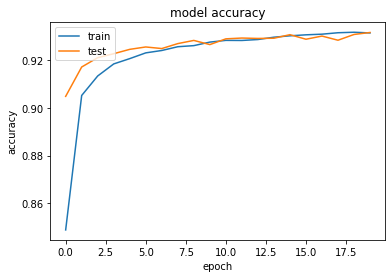

In [29]:
plt.plot(trained_model3.history['accuracy'])
plt.plot(trained_model3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

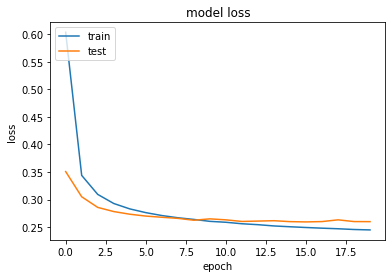

In [30]:
plt.plot(trained_model3.history['loss'])
plt.plot(trained_model3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [31]:
Y_pred3=model3.predict(X_test)
Y_pred3=Y_pred3.argmax(axis=1)
print(classification_report(Y_test,Y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.93      0.90      0.92      1032
           3       0.89      0.92      0.91      1010
           4       0.93      0.94      0.93       982
           5       0.91      0.87      0.89       892
           6       0.95      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.88      0.89      0.89       974
           9       0.93      0.90      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [32]:
#adam1

In [33]:
model4=tf.keras.Sequential([
      tf.keras.layers.Dense(10,input_shape=(784,),activation="softmax")
])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [34]:
model4.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model4=model4.fit(X_train,Y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5166 - accuracy: 0.8666 - val_loss: 0.3180 - val_accuracy: 0.9127
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3180 - accuracy: 0.9113 - val_loss: 0.2875 - val_accuracy: 0.9202
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2938 - accuracy: 0.9179 - val_loss: 0.2744 - val_accuracy: 0.9241
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2814 - accuracy: 0.9218 - val_loss: 0.2703 - val_accuracy: 0.9262
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2740 - accuracy: 0.9222 - val_loss: 0.2696 - val_accuracy: 0.9252
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2683 - accuracy: 0.9245 - val_loss: 0.2664 - val_accuracy: 0.9253
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2641 - accuracy: 0.9259 - val_loss: 0.2632 - val_accuracy:

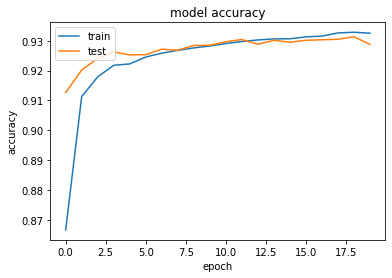

In [35]:
plt.plot(trained_model4.history['accuracy'])
plt.plot(trained_model4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

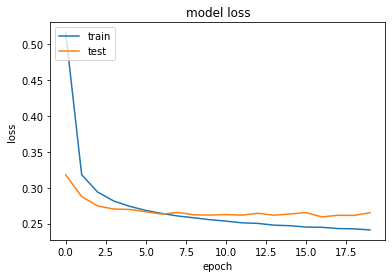

In [36]:
plt.plot(trained_model4.history['loss'])
plt.plot(trained_model4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [37]:
Y_pred4=model4.predict(X_test)
Y_pred4=Y_pred4.argmax(axis=1)
print(classification_report(Y_test,Y_pred4))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.93      0.90      0.92      1032
           3       0.92      0.90      0.91      1010
           4       0.95      0.92      0.94       982
           5       0.89      0.90      0.89       892
           6       0.94      0.95      0.95       958
           7       0.92      0.94      0.93      1028
           8       0.86      0.91      0.89       974
           9       0.93      0.90      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [38]:
#adagrad

In [39]:
model5=tf.keras.Sequential([
       tf.keras.layers.Dense(10,input_shape=(784,),activation="softmax")
])
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [40]:
model5.compile(optimizer="adagrad",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model5=model5.fit(X_train,Y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 1.6364 - accuracy: 0.5781 - val_loss: 1.2627 - val_accuracy: 0.7479
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 1.1493 - accuracy: 0.7591 - val_loss: 1.0074 - val_accuracy: 0.8024
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.9733 - accuracy: 0.7938 - val_loss: 0.8788 - val_accuracy: 0.8245
Epoch 4/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.8737 - accuracy: 0.8130 - val_loss: 0.7985 - val_accuracy: 0.8372
Epoch 5/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.8075 - accuracy: 0.8241 - val_loss: 0.7423 - val_accuracy: 0.8463
Epoch 6/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.7594 - accuracy: 0.8325 - val_loss: 0.7003 - val_accuracy: 0.8530
Epoch 7/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.7223 - accuracy: 0.8392 - val_loss: 0.6673 - val_accuracy:

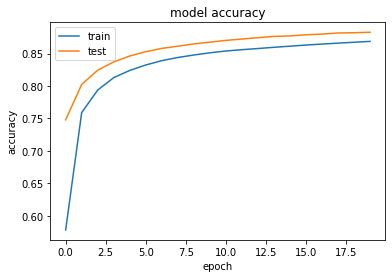

In [41]:
plt.plot(trained_model5.history['accuracy'])
plt.plot(trained_model5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

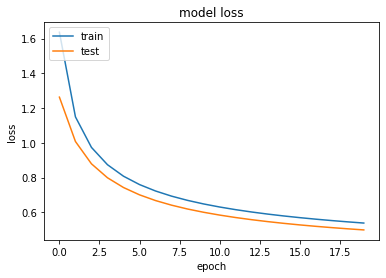

In [42]:
plt.plot(trained_model5.history['loss'])
plt.plot(trained_model5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [43]:
Y_pred5=model5.predict(X_test)
Y_pred5=Y_pred5.argmax(axis=1)
print(classification_report(Y_test,Y_pred5))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       980
           1       0.92      0.96      0.94      1135
           2       0.90      0.85      0.87      1032
           3       0.86      0.88      0.87      1010
           4       0.90      0.88      0.89       982
           5       0.88      0.77      0.82       892
           6       0.90      0.93      0.91       958
           7       0.91      0.88      0.89      1028
           8       0.81      0.84      0.83       974
           9       0.84      0.87      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [44]:
#rmsprop

In [45]:
model6=tf.keras.Sequential([
       tf.keras.layers.Dense(10,input_shape=(784,),activation="softmax")
])
model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [46]:
model6.compile(optimizer="rmsprop",loss='categorical_crossentropy',metrics=['accuracy'])
trained_model6=model6.fit(X_train,Y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4789 - accuracy: 0.8723 - val_loss: 0.3065 - val_accuracy: 0.9126
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3130 - accuracy: 0.9115 - val_loss: 0.2887 - val_accuracy: 0.9196
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2973 - accuracy: 0.9182 - val_loss: 0.2783 - val_accuracy: 0.9241
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2896 - accuracy: 0.9213 - val_loss: 0.2767 - val_accuracy: 0.9274
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2852 - accuracy: 0.9224 - val_loss: 0.2778 - val_accuracy: 0.9246
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2833 - accuracy: 0.9241 - val_loss: 0.2749 - val_accuracy: 0.9275
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2817 - accuracy: 0.9247 - val_loss: 0.2767 - val_accuracy

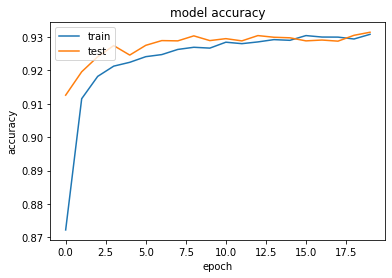

In [47]:
plt.plot(trained_model6.history['accuracy'])
plt.plot(trained_model6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

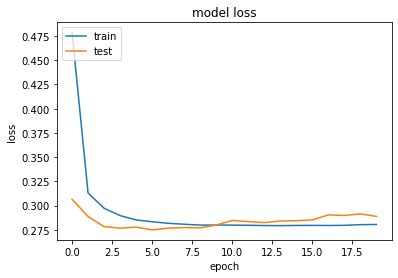

In [48]:
plt.plot(trained_model6.history['loss'])
plt.plot(trained_model6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [49]:
Y_pred6=model6.predict(X_test)
Y_pred6=Y_pred6.argmax(axis=1)
print(classification_report(Y_test,Y_pred6))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.92      0.90      0.91      1032
           3       0.90      0.90      0.90      1010
           4       0.95      0.92      0.93       982
           5       0.90      0.87      0.88       892
           6       0.95      0.95      0.95       958
           7       0.94      0.93      0.93      1028
           8       0.88      0.90      0.89       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

